In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Chargement des données.

df=pd.read_csv("Data.csv", sep=";")

In [3]:
# Exploration des données



In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander,Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen,Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen,Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson,Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson,Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [6]:
df.describe()


,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape


(891, 12)

In [8]:
df.dtypes.value_counts()


object     7
int64      3
float64    2
dtype: int64

In [9]:
df.isnull().sum()

PassengerId      1
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.isnull().sum().sum()

867

### Analyse de la forme:
- **Variable target**: survived
- **Lignes et colonnes**: (891, 12)
- **Types de variables**:float64(2), int64(3), object(7)
- **Nombre de valeurs manquantes**: 867


# 



#### Nettoyage des données

In [11]:
# Remplaçons les valeurs manquantes dans "Age" par la médiane.
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)

In [12]:
# Supprimons la colonne "Cabine" parce qu'elle comporte beaucoup trop de données manquantes.
df.drop('Cabin', axis=1, inplace=True)

In [13]:
# Suprimons les autres NaN.
df=df.dropna(how="any")

In [14]:
# Vérifions à nouveau les valeurs manquantes.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 


#### Transformons les données catégorielles en numériques.

In [15]:
# Survived

df["Survived"]=df["Survived"].replace(["Yes", "No"] , [1 , 0])

In [16]:
# Sex

df["Sex"]=df["Sex"].replace(["male", "female"] , [1 , 0])

In [17]:
# Embarked

df["Embarked"]=df["Embarked"].replace(["C", "S", "Q"] , [1 , 2, 3])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander,Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen,Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen,Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson,Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson,Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2


In [19]:
# Supprimons les colonnes PassengerId, Name et Ticket.

df = df.drop(['Ticket','Name', 'PassengerId'], axis=1)

In [20]:
# Transformons Age et Fare en entiers.

df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [21]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,0,0,13,2
1,0,3,1,25,0,0,7,2
2,0,3,1,20,0,0,7,2
3,0,3,0,29,0,4,21,2
4,0,1,1,31,1,0,52,2
6,0,3,1,19,0,0,14,2
7,1,3,0,1,0,2,15,1
8,0,3,1,20,0,0,7,2
9,1,2,0,42,1,0,26,2
10,0,2,1,25,0,0,13,2


# 

# 1_Appliquons la régression logistique. 

In [50]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)



LogisticRegression()

In [22]:
#features extraction

x = df.drop("Survived", axis=1) 
y = df["Survived"] 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


# 


# 2_Utilisons une matrice de confusion pour valider notre modèle.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

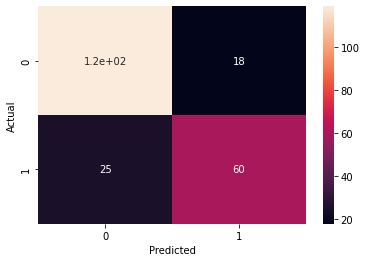

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# 


# 3_Expliquons et appliquons ROC/AUC

### Courbe ROC AUC

#### Une autre façon d'évaluer et de comparer votre classificateur binaire qui est fournie par la courbe ROC AUC. Cette courbe trace le taux de vrais positifs (également appelé rappel) par rapport au taux de faux positifs (rapport d'instances négatives mal classées), au lieu de tracer la précision par rapport au rappel.



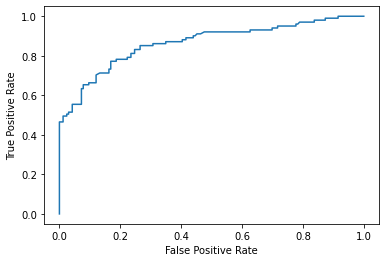

In [48]:
# Traçons la courbe de ROC.

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


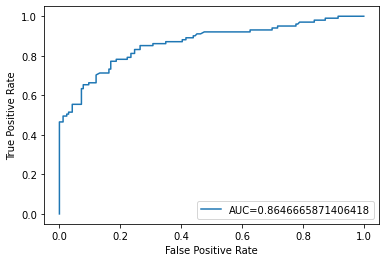

In [53]:
# Calculons la valeur de AUC

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


#### Le résultat obtenu montre que l'AUC du modèle est égal à 0.8646665871406418. Ce qui veut dire que notre modèle de régression logistique est efficace à 86% dans la classification des données.